## mongoengine

Document: https://docs.mongoengine.org/tutorial.html

In [15]:
from mongoengine import *
from IPython.display import Image
import datetime

In [10]:
user = ''
pw = ''
url = ''
DB_URI = "mongodb+srv://{}:{}@{}".format(user, pw, url)
connect(db="test",host=DB_URI)

MongoClient(host=['ac-cxqvpp1-shard-00-01.e1prl9a.mongodb.net:27017', 'ac-cxqvpp1-shard-00-02.e1prl9a.mongodb.net:27017', 'ac-cxqvpp1-shard-00-00.e1prl9a.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-d1h2i2-shard-0', ssl=True, read_preference=Primary(), uuidrepresentation=3)

## Image - image file

In [3]:
class Cam(Document):
    meta = {'collection': 'cam1'}
    img_id = StringField(required=True)
    cam_id = StringField(required=True)
    img_type = StringField(required=True)
    image = ImageField(thumbnail_size=(150,150,False))

In [12]:
test_ins1 = Cam(
    img_id = 'test_surveillance_3',
    cam_id = 'sjsu_googlemap',
    img_type = 'surveillance')
img = open('D:/CAM/StudentUnion.JPG','rb')
test_ins1.image.put(img, filename = 'sjsu_studentunion.jpg') # replace
test_ins1.save()

<Cam: Cam object>

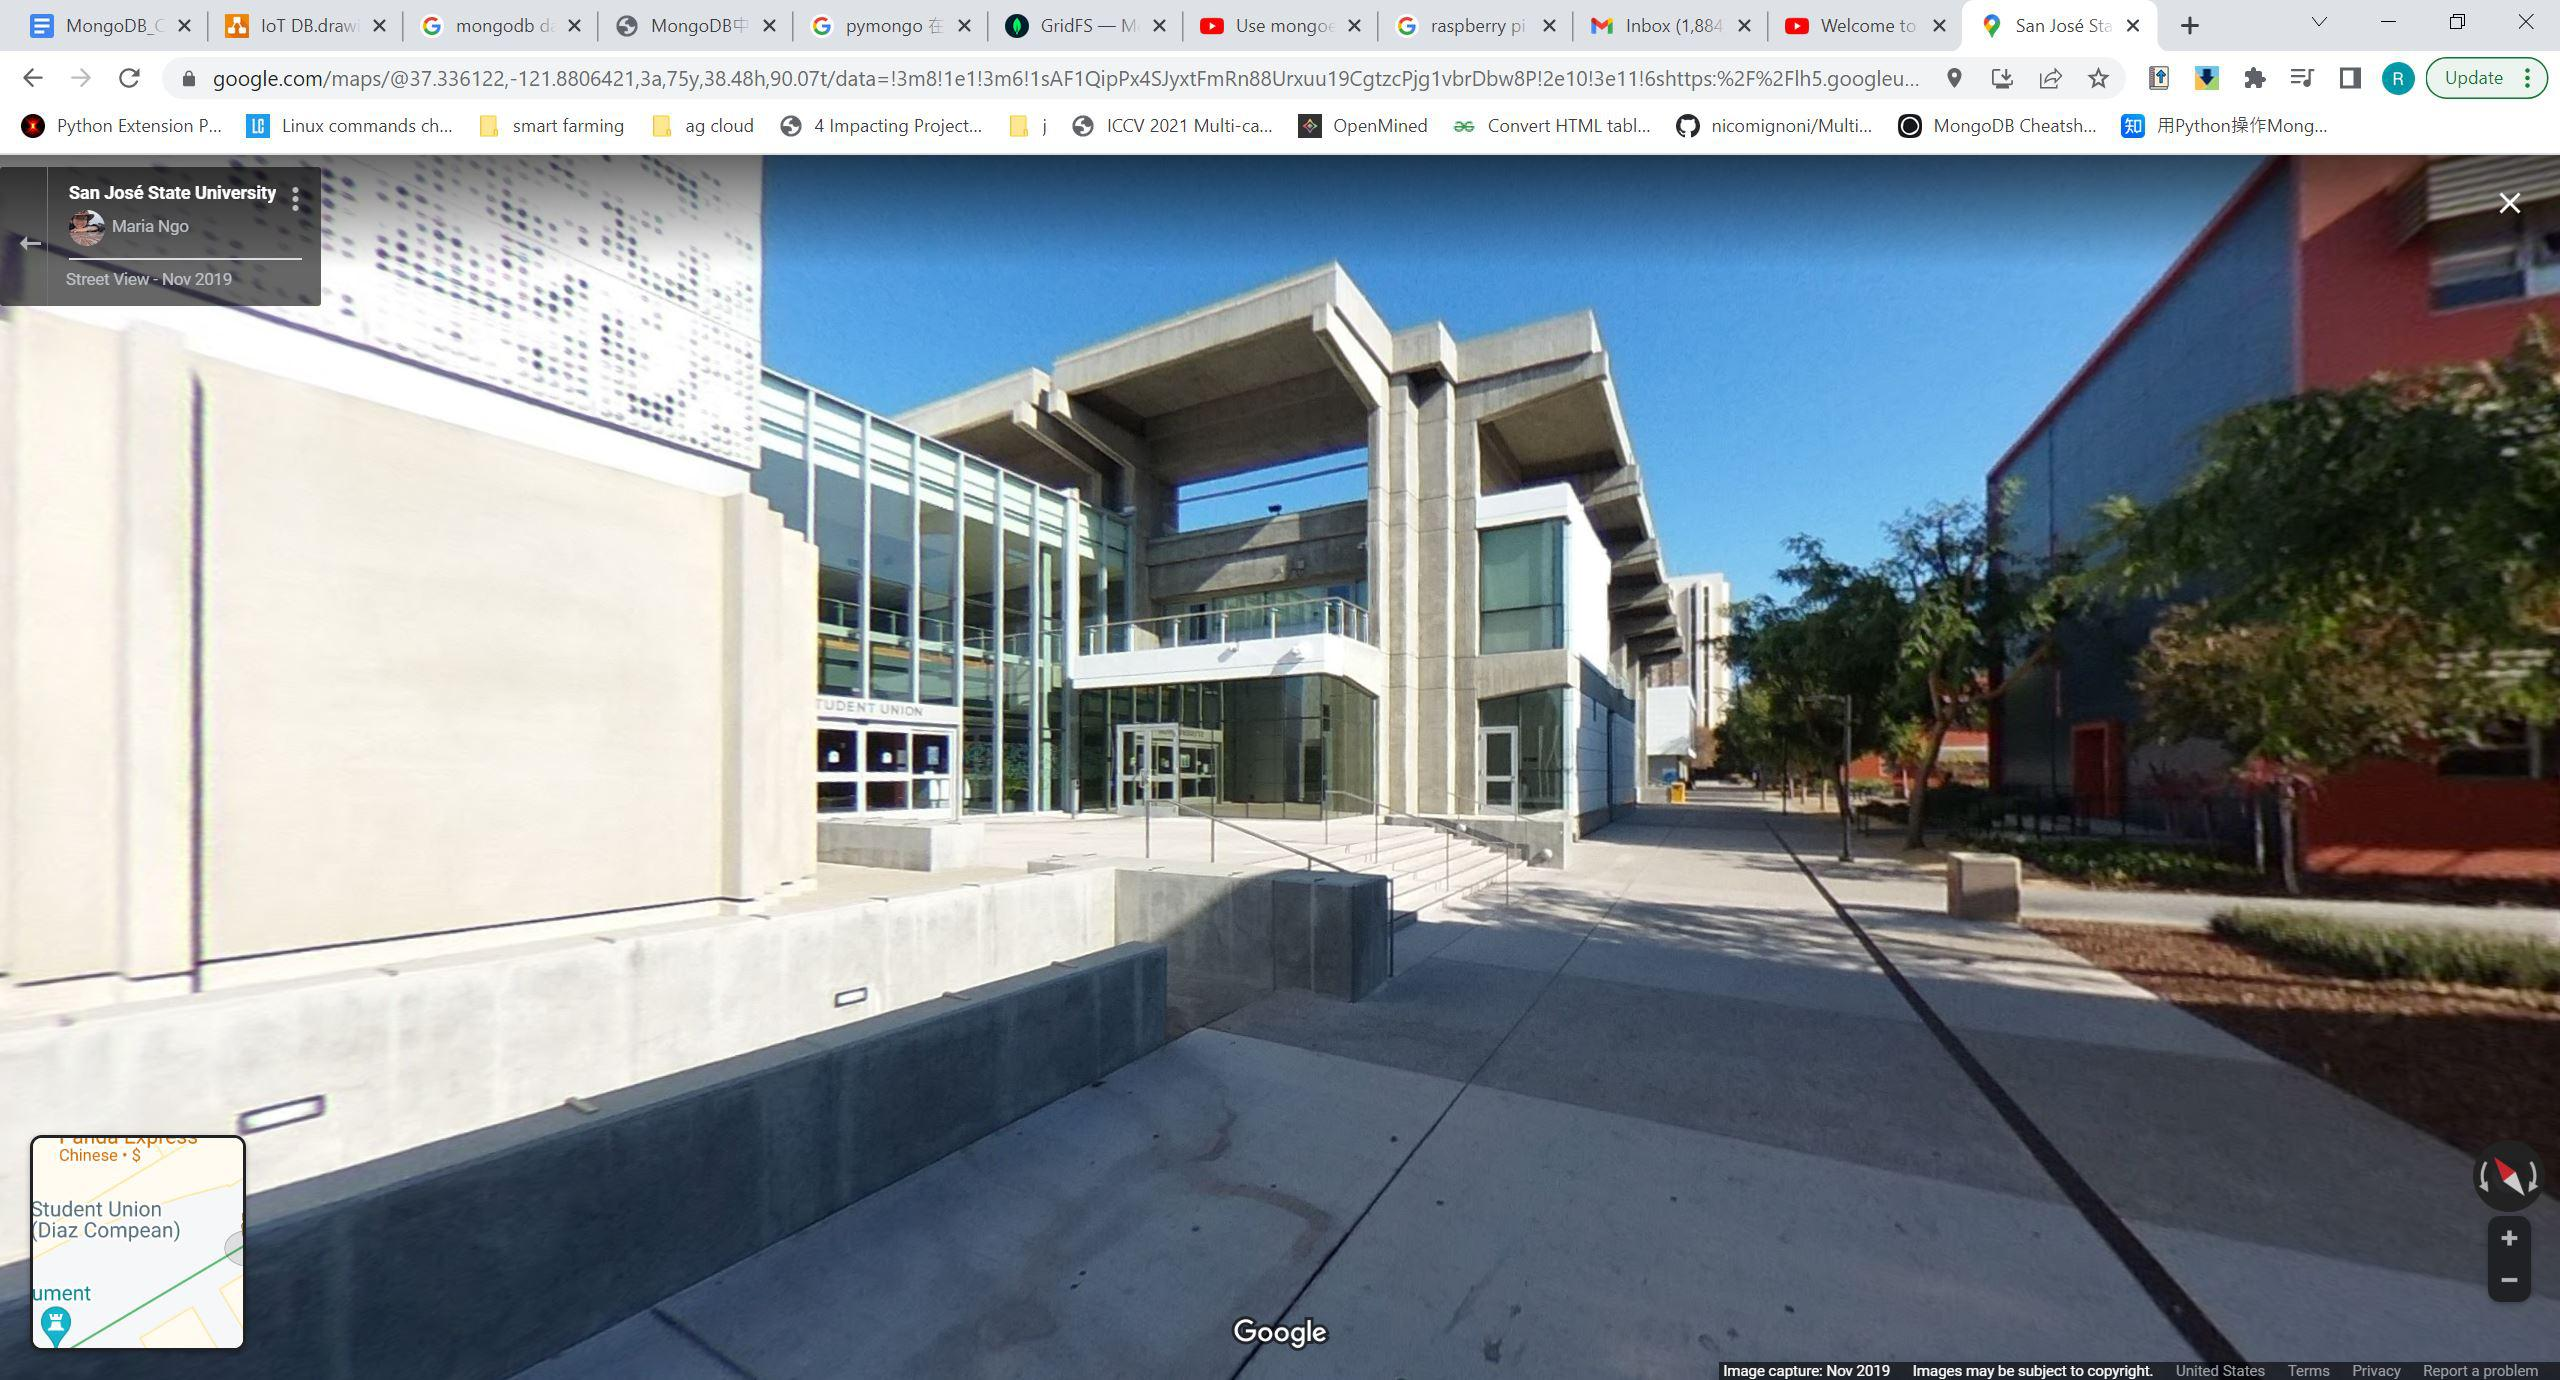

In [13]:
img1 = Cam.objects(img_id = 'test_plate_2').first()
Image(img1.image.read())

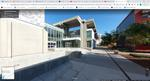

In [14]:
Image(img1.image.thumbnail.read())

## Video

In [18]:
class Drone(Document):
    meta = {'collection': 'cam1'}
    video_id = StringField(required=True)
    datetime = DateTimeField(required=True)
    drone_id = StringField(required=True)
    video = FileField(required=True)

In [20]:
vid1 = Drone(
    video_id = 'test_drone1',
    datetime = datetime.datetime.now(),
    drone_id = 'sjsu_drone'
)

In [19]:
img = open('D:/CAM/StudentUnion.JPG','rb')
test_ins1.image.put(img, filename = 'sjsu_studentunion.jpg') # replace
test_ins1.save()

datetime.datetime(2022, 10, 16, 22, 41, 3, 727977)

In [25]:
vid = open('D:/CAM/video1.mp4', 'rb')
vid1.video.put(vid, filename = 'video1.mp4')
vid1.save()

<Drone: Drone object>

In [35]:
read_video1 = Drone.objects(video_id = 'test_drone1').first()
with open('video1.mp4', 'wb') as f:
    f.write(read_video1.video.read())
    f.close

In [32]:
import cv2

In [41]:
cap = cv2.VideoCapture('video1.mp4')
frames_num=cap.get(7)
print(frames_num)
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow("A video", frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

True
30.0


In [39]:
cv2.destroyAllWindows() 